In [1]:
import numpy as np                 
import pandas as pd                
import matplotlib                  
import matplotlib.pyplot as plt      
import seaborn as sns                          
%matplotlib inline

In [2]:
dataset = pd.read_csv("18-DataB.csv")
dataset = dataset.iloc[:, 1:]
dataset.head()

,Carrier_Company_Name,Uniquely_Identified_Carrier,Source_Port,Destination_Port,Distance (Nautical_Miles),Ship_Length (ft),Ship_Beam (ft),Ship_Draft (ft),Storage_Capacity (#Conatiners),Is_Shared
0,CMA CGM,CMA-U123453,Tokyo,Busan,21028.841054,1171.217526,125.268891,44.925513,16478,0
1,COSCO,COS-U123453,Shanghai,Rotterdam,18644.409852,1145.605304,130.913864,44.945801,16852,0
2,Ocean Network Express (ONE),OCE-U123453,Heijin Yokohama,Port Klang,20071.663078,1030.556338,129.870227,43.454457,14540,0
3,Korea Marine Transport Corporation,KOR-U123453,Jebel Ali,Saigon,23234.052720,1089.353468,140.640839,43.488034,16657,0
4,CMA CGM,CMA-U123453,Tokyo,Busan,16011.415310,1191.283152,143.947124,44.046270,18883,0


array([[<AxesSubplot:title={'center':'Distance (Nautical_Miles)'}>,
        <AxesSubplot:title={'center':'Ship_Length (ft)'}>],
       [<AxesSubplot:title={'center':'Ship_Beam (ft)'}>,
        <AxesSubplot:title={'center':'Ship_Draft (ft)'}>],
       [<AxesSubplot:title={'center':'Storage_Capacity (#Conatiners)'}>,
        <AxesSubplot:title={'center':'Is_Shared'}>]], dtype=object)

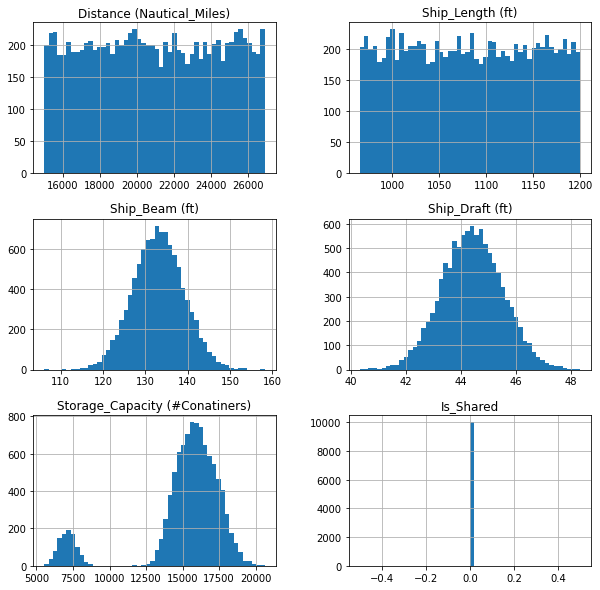

In [3]:
dataset.hist(bins=50, figsize=(10, 10))  # we can see the normal distribution in ship beam, ship draft and storage capacity

## Describing the dataset

### Overall Description

In [4]:
dataset.describe()

,Distance (Nautical_Miles),Ship_Length (ft),Ship_Beam (ft),Ship_Draft (ft),Storage_Capacity (#Conatiners),Is_Shared
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,20944.795867,1082.255700,133.072053,44.406726,15099.460500,0.0
std,3447.750579,68.237959,5.976980,1.104214,2944.757835,0.0
min,15000.213313,965.046783,106.100717,40.310158,5533.000000,0.0
25%,17977.591669,1022.577893,129.041255,43.661600,14623.750000,0.0
50%,20871.983487,1081.934482,133.053635,44.393544,15746.500000,0.0
75%,23973.998567,1141.919923,137.044715,45.148189,16816.000000,0.0
max,26879.183103,1199.985255,158.213400,48.333754,20619.000000,0.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Carrier_Company_Name            10000 non-null  object 
 1   Uniquely_Identified_Carrier     10000 non-null  object 
 2   Source_Port                     10000 non-null  object 
 3   Destination_Port                10000 non-null  object 
 4   Distance (Nautical_Miles)       10000 non-null  float64
 5   Ship_Length (ft)                10000 non-null  float64
 6   Ship_Beam (ft)                  10000 non-null  float64
 7   Ship_Draft (ft)                 10000 non-null  float64
 8   Storage_Capacity (#Conatiners)  10000 non-null  int64  
 9   Is_Shared                       10000 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 781.4+ KB


## Column-wise description

In [6]:
for i in dataset.columns:
    print(i + ":")
    print(f"Datatype : {type(dataset[i])}")
    print(dataset[i].describe())
    print("-"*100)
    print("")

Carrier_Company_Name:
Datatype : <class 'pandas.core.series.Series'>
count                                  10000
unique                                    10
top       Korea Marine Transport Corporation
freq                                    1052
Name: Carrier_Company_Name, dtype: object
----------------------------------------------------------------------------------------------------

Uniquely_Identified_Carrier:
Datatype : <class 'pandas.core.series.Series'>
count           10000
unique             10
top       KOR-U123453
freq             1052
Name: Uniquely_Identified_Carrier, dtype: object
----------------------------------------------------------------------------------------------------

Source_Port:
Datatype : <class 'pandas.core.series.Series'>
count         10000
unique           10
top       Jebel Ali
freq           1052
Name: Source_Port, dtype: object
----------------------------------------------------------------------------------------------------

Destination_Port:

## Domains of values

In [7]:
for i in dataset.columns:
    print(f"{i} : ({dataset[i].min()}, {dataset[i].max()})")
    print("")

Carrier_Company_Name : (CMA CGM, Wan Hai Lines)

Uniquely_Identified_Carrier : (CMA-U123453, WAN-U123453)

Source_Port : (Bremerhaven, Tokyo)

Destination_Port : (Antwerp, Tianjin)

Distance (Nautical_Miles) : (15000.2133133169, 26879.1831034049)

Ship_Length (ft) : (965.046782755526, 1199.985255457)

Ship_Beam (ft) : (106.10071687613, 158.213400000499)

Ship_Draft (ft) : (40.3101583955569, 48.3337543026321)

Storage_Capacity (#Conatiners) : (5533, 20619)

Is_Shared : (0, 0)



## Finding Anomalies and Pattern in each column

In [8]:
column_names = dataset.columns
column_names

Index(['Carrier_Company_Name', 'Uniquely_Identified_Carrier', 'Source_Port',
       'Destination_Port', 'Distance (Nautical_Miles)', 'Ship_Length (ft)',
       'Ship_Beam (ft)', 'Ship_Draft (ft)', 'Storage_Capacity (#Conatiners)',
       'Is_Shared'],
      dtype='object')

### Company Name

In [9]:
company = dataset.Carrier_Company_Name
company.head()

0                               CMA CGM
1                                 COSCO
2           Ocean Network Express (ONE)
3    Korea Marine Transport Corporation
4                               CMA CGM
Name: Carrier_Company_Name, dtype: object

<AxesSubplot:xlabel='Carrier_Company_Name', ylabel='count'>

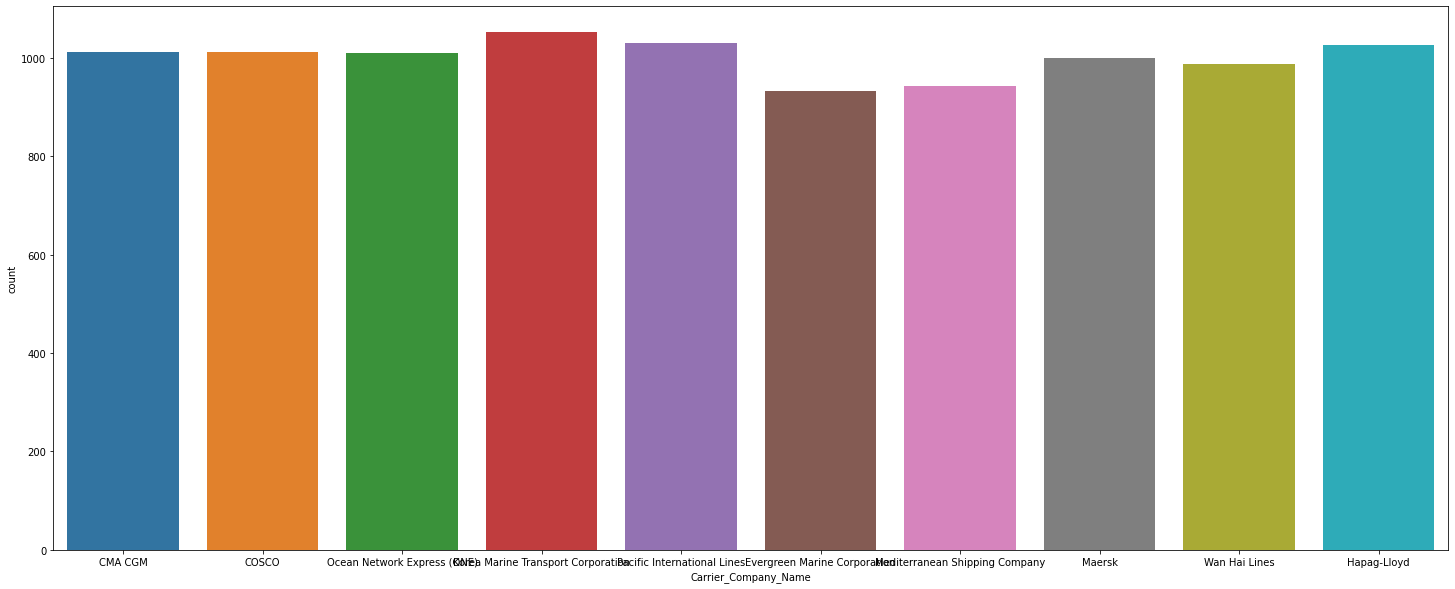

In [10]:
plt.figure(figsize=(25, 10))
sns.countplot(data=company, x=company)

Histogram plot of the data

### Uniquely Identified Carrier

In [11]:
uic = dataset.Uniquely_Identified_Carrier
uic.head()

0    CMA-U123453
1    COS-U123453
2    OCE-U123453
3    KOR-U123453
4    CMA-U123453
Name: Uniquely_Identified_Carrier, dtype: object

<AxesSubplot:xlabel='Uniquely_Identified_Carrier', ylabel='count'>

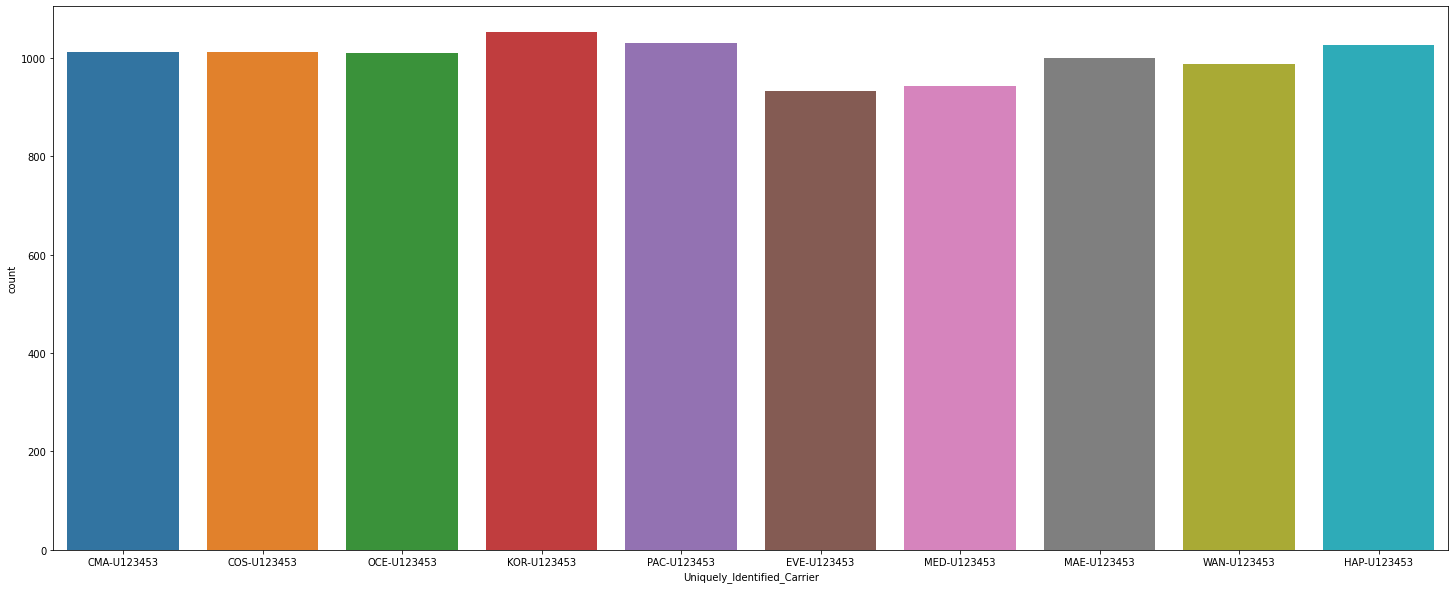

In [12]:
plt.figure(figsize=(25, 10))
sns.countplot(data=uic, x=uic)

Histogram plot of the data

### Source Port

In [13]:
source_port = dataset.Source_Port
source_port.head()

0              Tokyo
1           Shanghai
2    Heijin Yokohama
3          Jebel Ali
4              Tokyo
Name: Source_Port, dtype: object

<AxesSubplot:xlabel='Source_Port', ylabel='count'>

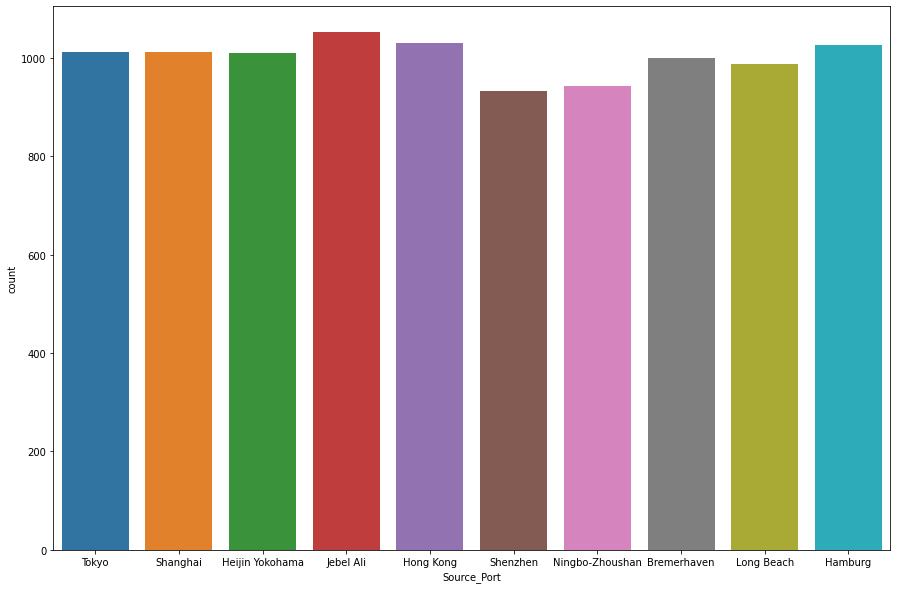

In [14]:
plt.figure(figsize=(15, 10))
sns.countplot(data=source_port, x=source_port)

Histogram plot of the data

### Destination Port 

In [15]:
destination_port = dataset.Destination_Port
destination_port.head()

0         Busan
1     Rotterdam
2    Port Klang
3        Saigon
4         Busan
Name: Destination_Port, dtype: object

<AxesSubplot:xlabel='Destination_Port', ylabel='count'>

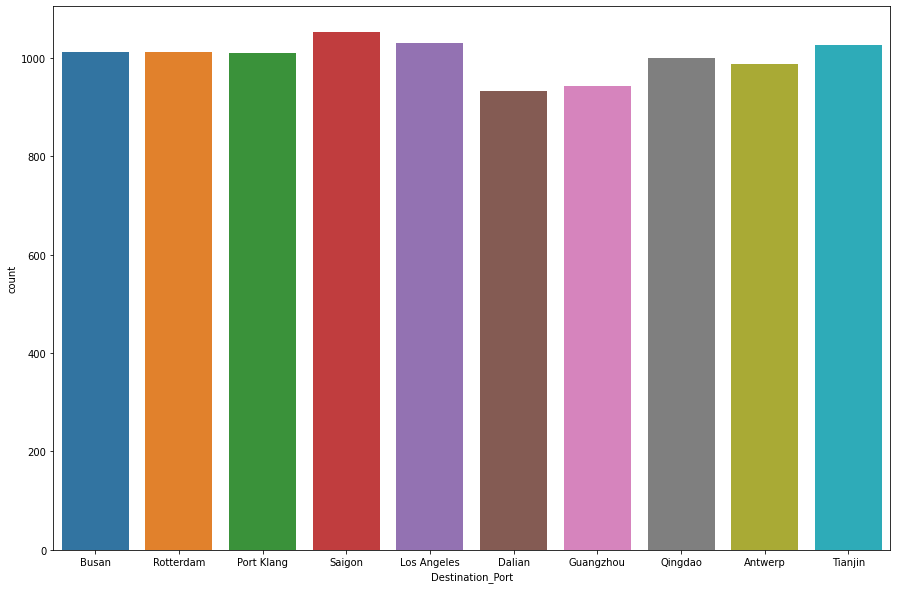

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(data=destination_port, x=destination_port)

Histogram plot of the data

We can see the 'Carrier_Company_Name', 'Uniquely_Identified_Carrier', 'Source_Port', 'Destination_Port' have the same Histogram for the values.

### Distance

In [17]:
distance = dataset["Distance (Nautical_Miles)"]
distance.head()

0    21028.841054
1    18644.409852
2    20071.663078
3    23234.052720
4    16011.415310
Name: Distance (Nautical_Miles), dtype: float64

<AxesSubplot:xlabel='Distance (Nautical_Miles)'>

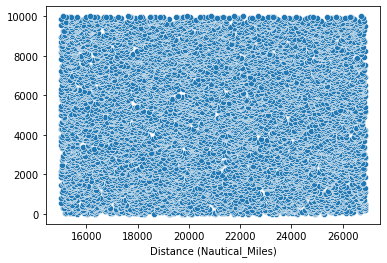

In [18]:
sns.scatterplot(data=distance, x=distance, y=range(10000))

Evenly Distributed Scatterplot

#### Anomaly Detection

##### Using Quartile Deviation method

In [19]:
Q1 = distance.quantile(0.2)
Q3 = distance.quantile(0.8)
IQR = Q3-Q1
Q1, Q3, IQR

(17387.65536119228, 24571.489907115683, 7183.834545923404)

In [20]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(6611.903542307173, 35347.24172600079)

In [21]:
outliers = []
for i in distance:
    if i>upper_limit or i<lower_limit:
        outliers.append(i)
outliers

[]

Text(0.5, 1.0, 'Boxplot for Distance column')

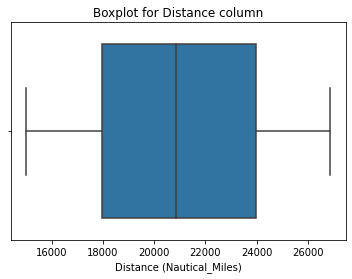

In [84]:
# No outlier detected
sns.boxplot(data=distance, x=distance)
plt.title("Boxplot for Distance column")

<AxesSubplot:>

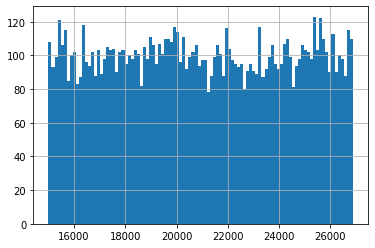

In [23]:
distance.hist(bins=100)

### Ship Length

In [24]:
ship_len = dataset["Ship_Length (ft)"]
ship_len.head()

0    1171.217526
1    1145.605304
2    1030.556338
3    1089.353468
4    1191.283152
Name: Ship_Length (ft), dtype: float64

<AxesSubplot:>

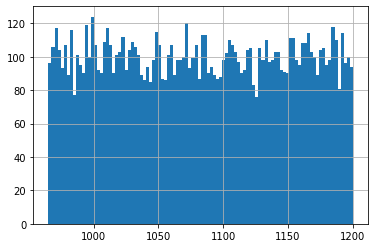

In [25]:
ship_len.hist(bins=100)

Evenly distributed data with floating point numbers as the data type

#### Anomaly Detection

##### Using Quartile deviation method

In [26]:
ship_len.min(), ship_len.max()

(965.046782755526, 1199.985255457)

In [27]:
Q1 = ship_len.quantile(0.2)
Q3 = ship_len.quantile(0.8)
IQR = Q3-Q1
Q1, Q3, IQR

(1010.92214681138, 1153.755530654454, 142.8333838430741)

In [28]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(796.6720710467689, 1368.0056064190653)

In [29]:
outliers = []
for i in ship_len:
    if i>upper or i<lower:
        outliers.append(i)
outliers

[]

Text(0.5, 1.0, 'Boxplot for Ship Length')

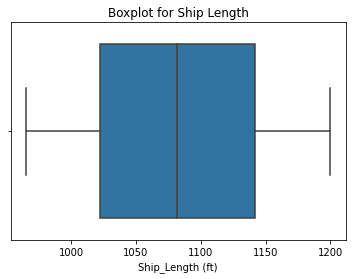

In [85]:
# Zero Outliers Detected
sns.boxplot(data=ship_len, x=ship_len)
plt.title("Boxplot for Ship Length")

### Ship Beam

In [31]:
ship_beam = dataset["Ship_Beam (ft)"]
ship_beam.head()

0    125.268891
1    130.913864
2    129.870227
3    140.640839
4    143.947124
Name: Ship_Beam (ft), dtype: float64

<AxesSubplot:>

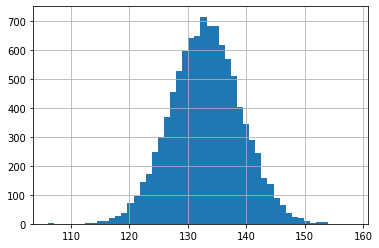

In [32]:
ship_beam.hist(bins=50)

It is the bell curve showing the Normal Distribution in the column.

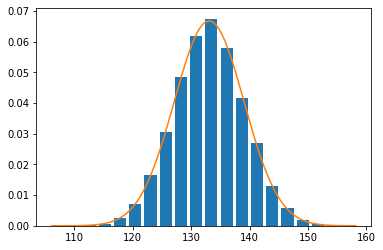

In [33]:
from scipy.stats import norm
plt.hist(ship_beam, bins=20, rwidth=0.8, density=True)
rng = np.arange(ship_beam.min(), ship_beam.max(), 0.1)
plt.plot(rng, norm.pdf(rng, ship_beam.mean(), ship_beam.std()))
# Bell curve shows Normal Distribution

It is the bell curve showing the Normal Distribution in the column.
Mathematical Description:


#### Anomaly detection

##### Using Quartile deviation method

In [34]:
Q1 = ship_beam.quantile(0.2)
Q3 = ship_beam.quantile(0.8)
IQR = Q3-Q1
Q1, Q3, IQR

(128.05098463625438, 138.0525362825318, 10.00155164627742)

In [35]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(113.04865716683825, 153.05486375194795)

In [36]:
outliers = []
for i in ship_beam:
    if i>upper or i<lower:
        outliers.append(i)
outliers

[111.147938511727,
 153.821261505092,
 112.990210098791,
 106.10071687613,
 153.406272364085,
 158.213400000499,
 106.393449752137,
 153.786368776247,
 153.119471060909,
 153.921585905135,
 153.655470780786]

###### Dataframe without outlier

In [37]:
ship_beam_df_with_no_outlier = ship_beam[(ship_beam<upper)&(ship_beam>lower)]
len(ship_beam_df_with_no_outlier)
ship_beam_df_with_no_outlier.head()

0    125.268891
1    130.913864
2    129.870227
3    140.640839
4    143.947124
Name: Ship_Beam (ft), dtype: float64

Text(0.5, 1.0, 'Boxplot for ShipBeam(ft)')

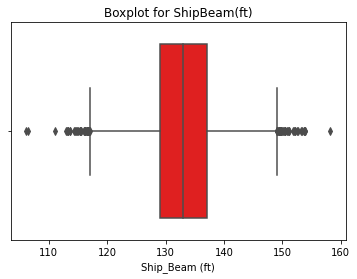

In [38]:
sns.boxplot(data=ship_beam, x=ship_beam, color="red")
plt.title("Boxplot for ShipBeam(ft)")

### Ship Draft

In [39]:
ship_draft = dataset["Ship_Draft (ft)"]
ship_draft.head()

0    44.925513
1    44.945801
2    43.454457
3    43.488034
4    44.046270
Name: Ship_Draft (ft), dtype: float64

<AxesSubplot:>

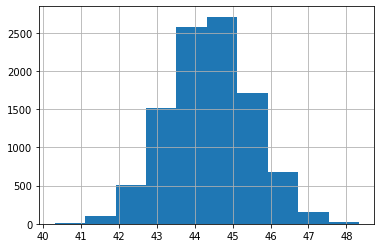

In [40]:
ship_draft.hist()

Text(0.5, 1.0, 'Ship Draft Bell Curve')

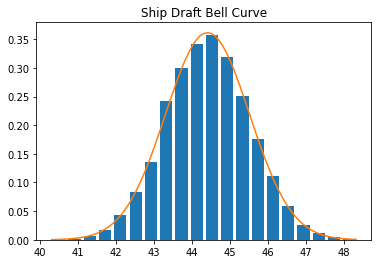

In [41]:
from scipy.stats import norm
plt.hist(ship_draft, bins=20, rwidth=0.8, density=True)
rng = np.arange(ship_draft.min(), ship_draft.max(), 0.1)
plt.plot(rng, norm.pdf(rng, ship_draft.mean(), ship_draft.std()))
plt.title("Ship Draft Bell Curve")
# Bell curve shows Normal Distribution

It is the bell curve showing the Normal Distribution in the column.

Mathematical Description:


#### Anomaly Detection

##### Using 3 Standard Deviation from Mean

In [42]:
mean = ship_draft.mean()
std = np.std(ship_draft)
mean, std

(44.406725967217845, 1.1041586169944229)

In [43]:
lower_bound = mean - 3*std
upper_bound = mean + 3*std

In [44]:
anomalies = []
for i in ship_draft:
    if i>upper_bound or i<lower_bound:
        anomalies.append(i)
len(anomalies)
anomalies

[48.1551360923857,
 40.8977325058241,
 40.6162748467276,
 47.8801960468583,
 47.792715741625,
 40.6634415840681,
 47.8101926167058,
 40.3624707853361,
 40.6695635348504,
 40.8117469832801,
 40.7416881650151,
 48.3157005167571,
 47.7791569845079,
 48.3185339309961,
 48.0116312737464,
 47.8180883656121,
 47.8365135464337,
 41.0447229075354,
 48.3337543026321,
 48.1318635205562,
 47.8611337234894,
 47.9852063769665,
 40.7286567440906,
 40.7298254655064,
 40.9327776367044,
 40.3101583955569,
 40.8340614579516,
 40.6873036811692,
 40.9457529433716,
 40.4426407497061]

###### Dataframe without outlier

In [45]:
ship_draft_df_with_no_anomalies = ship_draft[(ship_draft<upper_bound)&(ship_draft>lower_bound)]
len(ship_draft_df_with_no_anomalies)

9970

<AxesSubplot:>

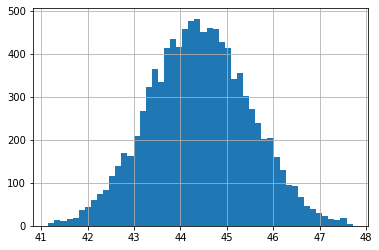

In [46]:
ship_draft_df_with_no_anomalies.hist(bins=50)

This is the bell-curve or Normal Distribution curve after the anomalies are removed

### Storage Capacity

In [47]:
storage = dataset["Storage_Capacity (#Conatiners)"]
storage.head()

0    16478
1    16852
2    14540
3    16657
4    18883
Name: Storage_Capacity (#Conatiners), dtype: int64

<AxesSubplot:>

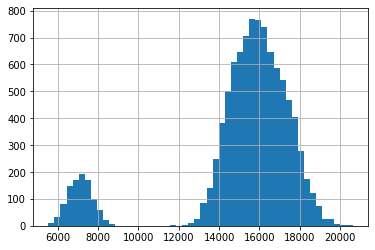

In [48]:
storage.hist(bins=50)

It is the bell curve showing the Normal Distribution in the column.
Two bell-curves shows the partition of Nomally Distributed data.

In [49]:
# splitting dataframe into two
storage_df1 = storage[storage<10000]
storage_df2 = storage[storage>=10000]

#### Finding Anomalies in both splits

##### Using 3 Standard deviation from mean

###### For first split

In [50]:
mean = storage_df1.mean()
std = np.std(storage_df1)
lower_limit = mean - 3*std
upper_limit = mean + 3*std
mean, std, lower_limit, upper_limit


(7127.007, 600.9514896819876, 5324.152530954037, 8929.861469045962)

In [51]:
anomaly_storage_df1 = storage_df1[(storage_df1<lower_limit) | (storage_df1>upper_limit)]
anomaly_storage_df1

9379    8937
Name: Storage_Capacity (#Conatiners), dtype: int64

In [52]:
storage_df1_with_no_anomaly = storage_df1[(storage_df1>lower_limit) & (storage_df1<upper_limit)]
len(storage_df1_with_no_anomaly)

999

###### For second split

In [53]:
mean = storage_df2.mean()
std = np.std(storage_df2)
lower_limit = mean - 3*std
upper_limit = mean + 3*std
mean, std, lower_limit, upper_limit


(15985.288666666667, 1321.7805375933042, 12019.947053886754, 19950.63027944658)

In [54]:
anomaly_storage_df2 = storage_df2[(storage_df2<lower_limit) | (storage_df2>upper_limit)]
anomaly_storage_df2

553     20309
1063    20068
2926    19956
3175    11699
5204    11676
5547    20039
7867    20619
8982    20352
Name: Storage_Capacity (#Conatiners), dtype: int64

In [55]:
storage_df2_with_no_anomaly = storage_df2[(storage_df2>lower_limit) & (storage_df2<upper_limit)]
len(storage_df2_with_no_anomaly)

8992

In [56]:
# Merging the storage dataframe with no anomaly
final_storage_df_with_no_anomaly = pd.concat([storage_df1_with_no_anomaly, storage_df2_with_no_anomaly], axis=0)
len(final_storage_df_with_no_anomaly)

9991

<AxesSubplot:>

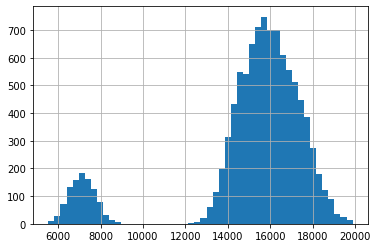

In [57]:
final_storage_df_with_no_anomaly.hist(bins=50)

## Relationship in this dataset

### Pearson

In [58]:
dataset.corr(method="pearson")

,Distance (Nautical_Miles),Ship_Length (ft),Ship_Beam (ft),Ship_Draft (ft),Storage_Capacity (#Conatiners),Is_Shared
Distance (Nautical_Miles),1.000000,0.004601,-0.013994,0.000761,-0.008214,NaN
Ship_Length (ft),0.004601,1.000000,0.032251,0.006503,0.328355,NaN
Ship_Beam (ft),-0.013994,0.032251,1.000000,0.016158,0.237556,NaN
Ship_Draft (ft),0.000761,0.006503,0.016158,1.000000,0.113633,NaN
Storage_Capacity (#Conatiners),-0.008214,0.328355,0.237556,0.113633,1.000000,NaN
Is_Shared,NaN,NaN,NaN,NaN,NaN,NaN


### Kendall
Kendall's Tau = (C – D / C + D)

In [59]:
dataset.corr(method="kendall")

,Distance (Nautical_Miles),Ship_Length (ft),Ship_Beam (ft),Ship_Draft (ft),Storage_Capacity (#Conatiners),Is_Shared
Distance (Nautical_Miles),1.000000,0.003261,-0.009514,0.002641,-0.003988,-1.0
Ship_Length (ft),0.003261,1.000000,0.019751,0.003707,0.479354,-1.0
Ship_Beam (ft),-0.009514,0.019751,1.000000,0.013138,0.303641,-1.0
Ship_Draft (ft),0.002641,0.003707,0.013138,1.000000,0.156238,-1.0
Storage_Capacity (#Conatiners),-0.003988,0.479354,0.303641,0.156238,1.000000,-1.0
Is_Shared,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0


### Spearman

In [60]:
dataset.corr(method="spearman")

,Distance (Nautical_Miles),Ship_Length (ft),Ship_Beam (ft),Ship_Draft (ft),Storage_Capacity (#Conatiners),Is_Shared
Distance (Nautical_Miles),1.000000,0.005066,-0.014316,0.003953,-0.005725,NaN
Ship_Length (ft),0.005066,1.000000,0.029692,0.005683,0.648231,NaN
Ship_Beam (ft),-0.014316,0.029692,1.000000,0.019640,0.434235,NaN
Ship_Draft (ft),0.003953,0.005683,0.019640,1.000000,0.231195,NaN
Storage_Capacity (#Conatiners),-0.005725,0.648231,0.434235,0.231195,1.000000,NaN
Is_Shared,NaN,NaN,NaN,NaN,NaN,NaN


#### We can see Storage_Capacity(#Containers) is somehow dependent on Ship_length(ft), Ship_beam(ft), Ship_draft(ft)

## Identifier

### Try1

In [61]:
dataset.head()

,Carrier_Company_Name,Uniquely_Identified_Carrier,Source_Port,Destination_Port,Distance (Nautical_Miles),Ship_Length (ft),Ship_Beam (ft),Ship_Draft (ft),Storage_Capacity (#Conatiners),Is_Shared
0,CMA CGM,CMA-U123453,Tokyo,Busan,21028.841054,1171.217526,125.268891,44.925513,16478,0
1,COSCO,COS-U123453,Shanghai,Rotterdam,18644.409852,1145.605304,130.913864,44.945801,16852,0
2,Ocean Network Express (ONE),OCE-U123453,Heijin Yokohama,Port Klang,20071.663078,1030.556338,129.870227,43.454457,14540,0
3,Korea Marine Transport Corporation,KOR-U123453,Jebel Ali,Saigon,23234.052720,1089.353468,140.640839,43.488034,16657,0
4,CMA CGM,CMA-U123453,Tokyo,Busan,16011.415310,1191.283152,143.947124,44.046270,18883,0


In [62]:
stage1 = dataset["Distance (Nautical_Miles)"]
stage1.head()

0    21028.841054
1    18644.409852
2    20071.663078
3    23234.052720
4    16011.415310
Name: Distance (Nautical_Miles), dtype: float64

In [63]:
stage2 = (np.array(stage1)*999)

In [64]:
stage3 = [int(i) for i in stage2]
stage4 = np.array(stage3)

In [65]:
len(np.unique(stage4))

9995

In [66]:
val = []
for i in range(0, 10000):
    val.append((int(stage1[i])*i))
print(len(np.unique(np.array(val))))

10000


In [67]:
generated_identifier = pd.DataFrame(val, columns=["GenratedIdentifier"])

In [68]:
new_df = pd.concat([dataset, generated_identifier], axis="columns")

In [72]:
new_df.head()

,Carrier_Company_Name,Uniquely_Identified_Carrier,Source_Port,Destination_Port,Distance (Nautical_Miles),Ship_Length (ft),Ship_Beam (ft),Ship_Draft (ft),Storage_Capacity (#Conatiners),Is_Shared,GenratedIdentifier
0,CMA CGM,CMA-U123453,Tokyo,Busan,21028.841054,1171.217526,125.268891,44.925513,16478,0,0
1,COSCO,COS-U123453,Shanghai,Rotterdam,18644.409852,1145.605304,130.913864,44.945801,16852,0,18644
2,Ocean Network Express (ONE),OCE-U123453,Heijin Yokohama,Port Klang,20071.663078,1030.556338,129.870227,43.454457,14540,0,40142
3,Korea Marine Transport Corporation,KOR-U123453,Jebel Ali,Saigon,23234.052720,1089.353468,140.640839,43.488034,16657,0,69702
4,CMA CGM,CMA-U123453,Tokyo,Busan,16011.415310,1191.283152,143.947124,44.046270,18883,0,64044


Tried using Distance with integral values and the index, got the result.
mathematical description = index * int(Distance (Nautical Miles))

### Try2

In [70]:
df1 = dataset.copy()

In [71]:
df1.head()

,Carrier_Company_Name,Uniquely_Identified_Carrier,Source_Port,Destination_Port,Distance (Nautical_Miles),Ship_Length (ft),Ship_Beam (ft),Ship_Draft (ft),Storage_Capacity (#Conatiners),Is_Shared
0,CMA CGM,CMA-U123453,Tokyo,Busan,21028.841054,1171.217526,125.268891,44.925513,16478,0
1,COSCO,COS-U123453,Shanghai,Rotterdam,18644.409852,1145.605304,130.913864,44.945801,16852,0
2,Ocean Network Express (ONE),OCE-U123453,Heijin Yokohama,Port Klang,20071.663078,1030.556338,129.870227,43.454457,14540,0
3,Korea Marine Transport Corporation,KOR-U123453,Jebel Ali,Saigon,23234.052720,1089.353468,140.640839,43.488034,16657,0
4,CMA CGM,CMA-U123453,Tokyo,Busan,16011.415310,1191.283152,143.947124,44.046270,18883,0


In [77]:
identifier = []
for i in range(10000):
    string = df1.Uniquely_Identified_Carrier[i] + df1.Carrier_Company_Name[i] + str(df1["Storage_Capacity (#Conatiners)"][i])
    identifier.append(string)
identifier[:10]

['CMA-U123453CMA CGM16478',
 'COS-U123453COSCO16852',
 'OCE-U123453Ocean Network Express (ONE)14540',
 'KOR-U123453Korea Marine Transport Corporation16657',
 'CMA-U123453CMA CGM18883',
 'PAC-U123453Pacific International Lines15913',
 'KOR-U123453Korea Marine Transport Corporation14120',
 'EVE-U123453Evergreen Marine Corporation14599',
 'EVE-U123453Evergreen Marine Corporation14811',
 'MED-U123453Mediterranean Shipping Company6761']

In [78]:
len(np.unique(identifier))         #failed attempt

9182

Used string containing columns, Uniquely_Identified_Carrier, Carrier_Company_Name, and Storage_Capacity

Mathematical Description:
identifier = Uniquely_Identified_Carrier + Carrier_Company_Name + Storage_Capacity

### Try-3

In [81]:
identifier = []
for i in range(10000):
    string = df1["Source_Port"][i] + df1["Uniquely_Identified_Carrier"][i] + df1["Destination_Port"][i] + str(int(df1["Distance (Nautical_Miles)"][i]))
    identifier.append(string)
identifier[:10]

['TokyoCMA-U123453Busan21028',
 'ShanghaiCOS-U123453Rotterdam18644',
 'Heijin YokohamaOCE-U123453Port Klang20071',
 'Jebel AliKOR-U123453Saigon23234',
 'TokyoCMA-U123453Busan16011',
 'Hong KongPAC-U123453Los Angeles17678',
 'Jebel AliKOR-U123453Saigon18261',
 'ShenzhenEVE-U123453Dalian18234',
 'ShenzhenEVE-U123453Dalian22316',
 'Ningbo-ZhoushanMED-U123453Guangzhou20104']

In [82]:
len(np.unique(identifier)) #failed to find the identifier

9618

Used, string containing columns, Uniquely_Identified_Carrier, Source_port, Destination_port, and Distance(Nautical Miles)

Mathematical Description: identifier = Source_port + Uniquely_Identified_Carrier + Destination_port + Distance(Nautical Miles)

Three failed attempts, hence couldn't find an Identifier or composite identifier